<a href="https://colab.research.google.com/github/Skander28/Task1-ML/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRIP : The Sparks Foundation

### Data Science and Business Analytics Intern

### Author : Laribi Skander

### Task 1 : Prediction Using Supervised ML



### **Importing all libraries required**

In [30]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns


**Reading data from remote link**

In [31]:
url = "http://bit.ly/w-data"
l_data = pd.read_csv(url)
print("Data imported successfully")

l_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [32]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### **Visualizing The Data**

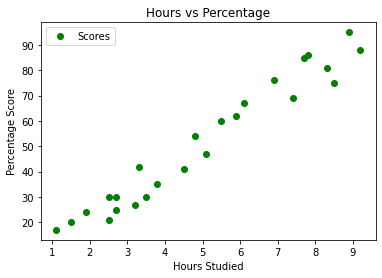

In [33]:
l_data.plot(x='Hours', y='Scores', color='green',style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied'**

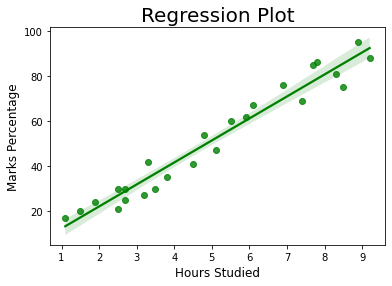

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [34]:
sns.regplot(x= l_data['Hours'], y= l_data['Scores'],color="green")
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(l_data.corr())

### **Splitting the Data**

**We divide the data into target(output) as y and features(input) as X.
We're going to use Scikit-Learn's built-in train_test_split() method to split the data to training data and testing data.**

In [35]:
# Defining X and y from the Data
X = l_data.iloc[:, :-1].values  
y = l_data.iloc[:, 1].values

# Spliting the Data in two
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y,test_size=0.2, random_state = 0)

###**Training the model** 

**We're going to train the model with the training data**

In [36]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression(normalize=True)
LR.fit(train_X, train_y)
print("********training done*******")

********training done*******


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


### **Making Predictions**

**We're going to make predictions with our trained model using the testing data**

In [37]:
y_pred= LR.predict(val_X)

In [38]:
pd.DataFrame({'True_Value':val_y,'PREDICTED_Value':y_pred})

,True_Value,PREDICTED_Value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **Evaluating the Model**

**We're going to use the mean absolute error which is the mean of the absolute values of the individual prediction errors on over all instances in the test set.**

In [39]:
from sklearn.metrics import mean_absolute_error
print ('Mean Absolute Error=',mean_absolute_error(val_y,y_pred))

Mean Absolute Error= 4.183859899002982


**We're going to use the Coefficient of determination which is the measure of the goodness of fit of a model**

In [40]:
from sklearn.metrics import r2_score
r2_score(val_y,y_pred)

0.9454906892105354

## **What will be the percentage score of a student who studies 9.25 hours?**

In [42]:
hours=9.25
a=LR.predict([[hours]])
print("No of Hours = {}".format(hours))
print('Predicted Score = {}'.format(*a))

No of Hours = 9.25
Predicted Score = 93.69173248737539
